# PROBLEM STATEMENT
  + This dataset  contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the       Agaricus and Lepiota Family Mushroom.
  + Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This     last category was merged with the toxic category.
  + The objective is to create a model that can predict edibility of the Mushroom based on its features.

# Attribut Information: (Classes: edible=e, poisonous=p)
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

 
                                
 

                           

# DATA INGESTION
Data Ingestion with Pandas, is the process, of shifting data, from a variety of sources, into the Pandas
DataFrame structure. The source of data can be varying file formats such as Comma Separated Data, JSON,
HTML webpage table, Excel. In this article, we will learn about, transferring data, from such formats, into the
destination, which is a Pandas dataframe object.

In [3]:
# For reading the data 
import pandas as pd
import datetime
import numpy as np

# For graphical visualizaton of data 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For spliting the data into train and test 
from sklearn.model_selection import train_test_split

#For standardizing
from sklearn.preprocessing import StandardScaler

# Take backup of standarized data
import pickle

# For encoding categorical data
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/mushrooms.csv')

In [5]:
# TO FIND SHAPE OF THE DATASET
print("Number of Rows =",data.shape[0])
print("Number of Columns =", data.shape[1])

Number of Rows = 8124
Number of Columns = 23


In [6]:
# TO DISPLAY COLUMNS OF THE DATASET
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# TO DISPLAY ALL COLUMNS OF THE DATASET
pd.set_option('display.max_columns',None) 

# TO DISPLAY TOP 5 ROWS OF THE DATASET
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [8]:
# TO DISPLAY LAST 5 ROWS OF THE DATASET
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [9]:
# TO GET INFORMATION ABOUT THE DATASET 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
# TO CHECK NULL VALUES IN THE DATASET
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
# TO GET OVERALL STATISTICS ABOUT THE DATASET
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [12]:
# Unique occurrences of ‘class’ column
data['class'].unique()

array(['p', 'e'], dtype=object)

In [13]:
M_cols = data.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",data[col].value_counts(),"\n\n")

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

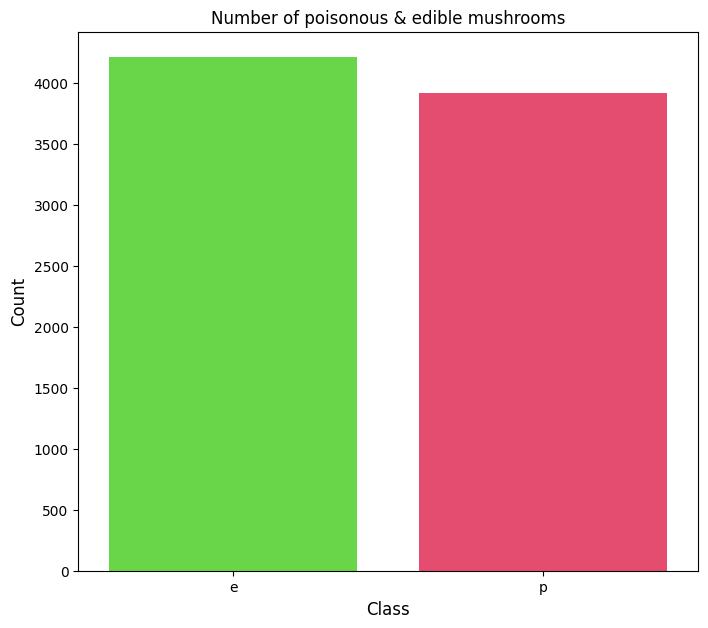

In [14]:
# Now let’s visualize the count of edible and poisonous mushrooms using Seaborn
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous & edible mushrooms')
plt.show()


In [15]:
# DEFINE NUMERICAL AND CATEGORICAL COLUMNS 
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# PRINT COLUMNS
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 23 categorical features : ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


# DATA MANIPULATION
The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column  to a number.This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column  is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [16]:
data=data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [17]:
le = LabelEncoder()
for column in data.columns:
    data[column]=le.fit_transform(data[column])

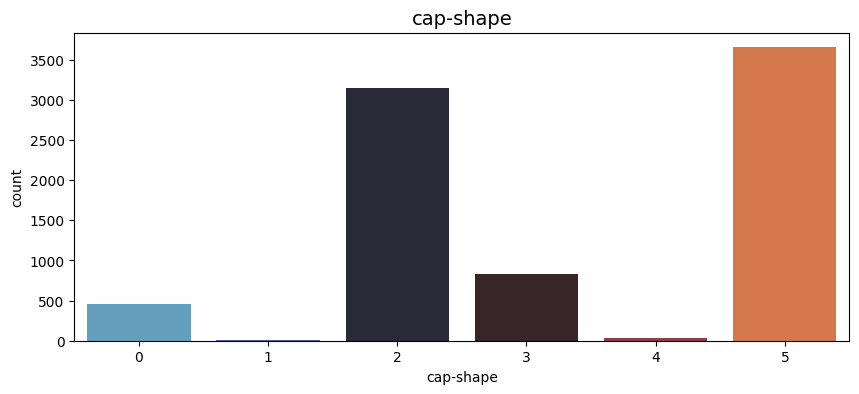

% of total:
5    45.00
2    38.80
3    10.19
0     5.56
4     0.39
1     0.05
Name: cap-shape, dtype: float64


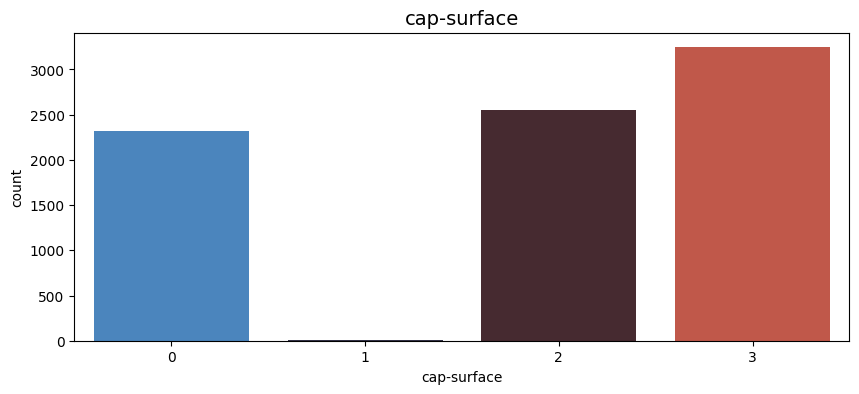

% of total:
3    39.93
2    31.46
0    28.56
1     0.05
Name: cap-surface, dtype: float64


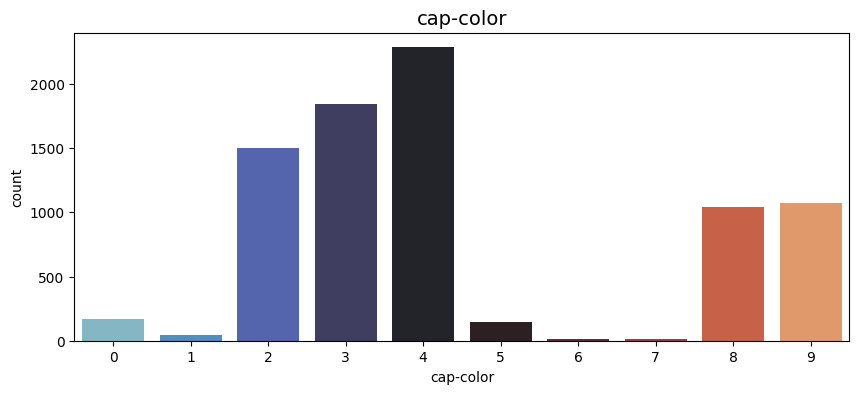

% of total:
4    28.11
3    22.65
2    18.46
9    13.20
8    12.80
0     2.07
5     1.77
1     0.54
7     0.20
6     0.20
Name: cap-color, dtype: float64


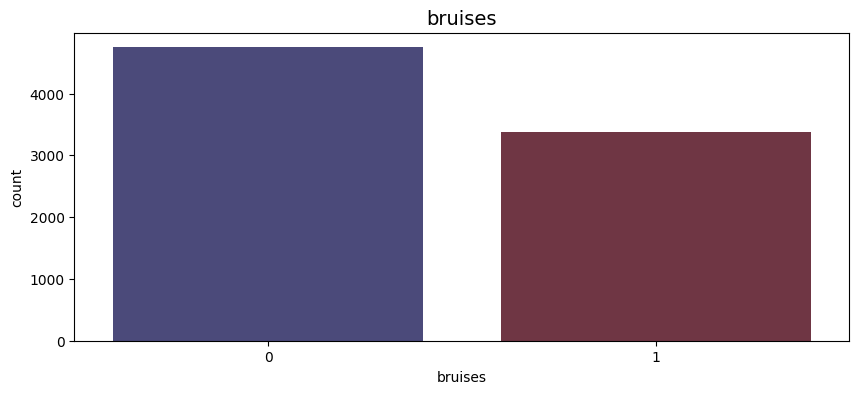

% of total:
0    58.44
1    41.56
Name: bruises, dtype: float64


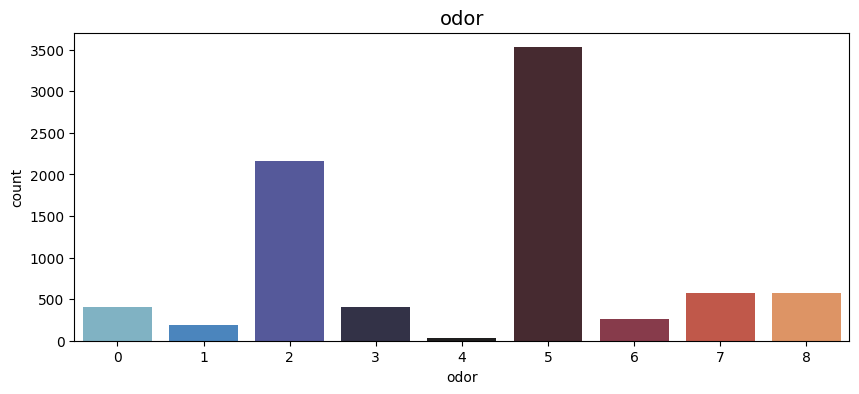

% of total:
5    43.43
2    26.59
8     7.09
7     7.09
0     4.92
3     4.92
6     3.15
1     2.36
4     0.44
Name: odor, dtype: float64


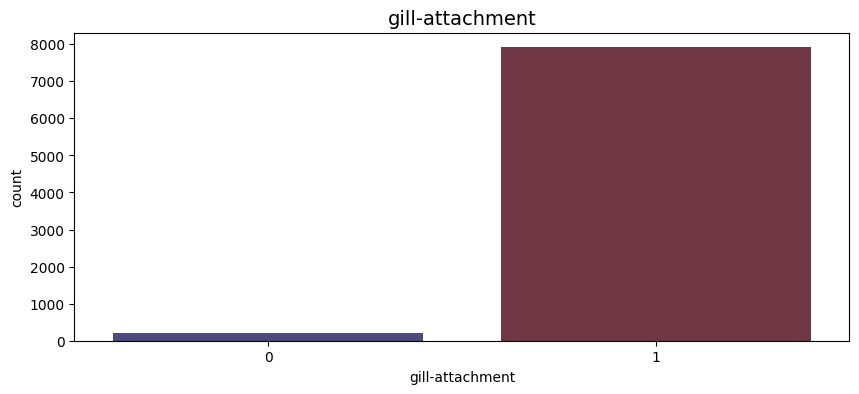

% of total:
1    97.42
0     2.58
Name: gill-attachment, dtype: float64


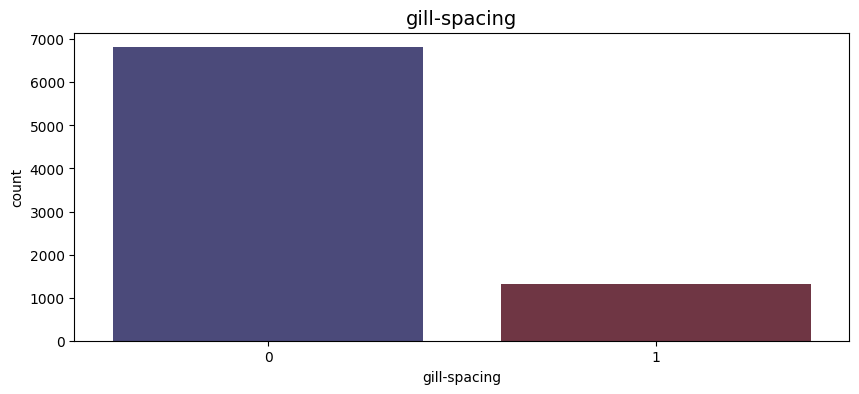

% of total:
0    83.85
1    16.15
Name: gill-spacing, dtype: float64


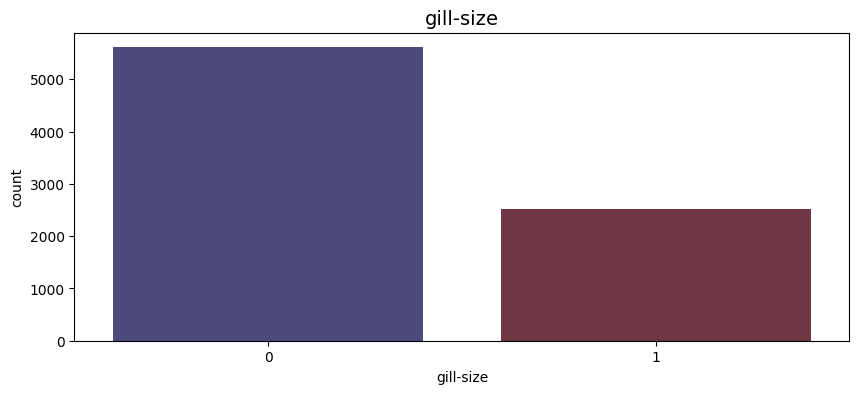

% of total:
0    69.08
1    30.92
Name: gill-size, dtype: float64


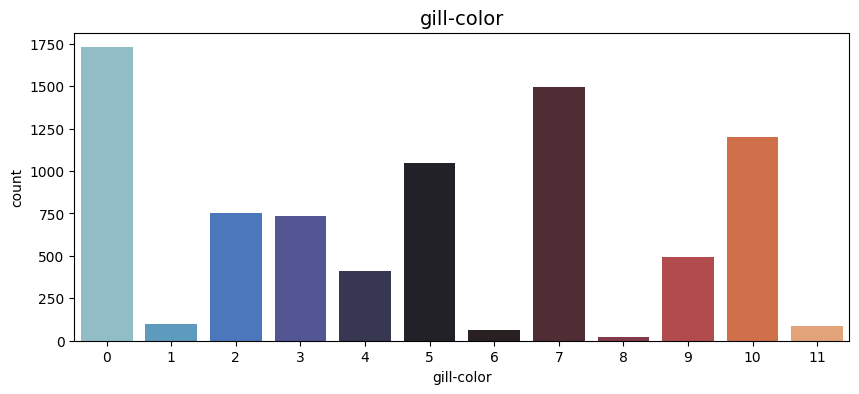

% of total:
0     21.27
7     18.37
10    14.80
5     12.90
2      9.26
3      9.01
9      6.06
4      5.02
1      1.18
11     1.06
6      0.79
8      0.30
Name: gill-color, dtype: float64


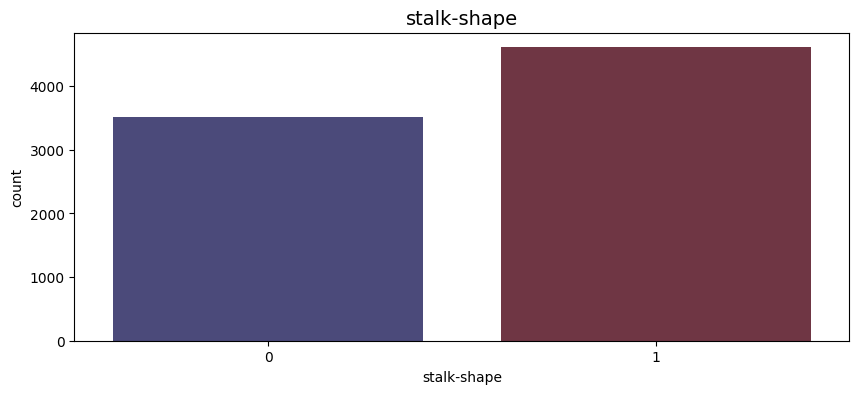

% of total:
1    56.72
0    43.28
Name: stalk-shape, dtype: float64


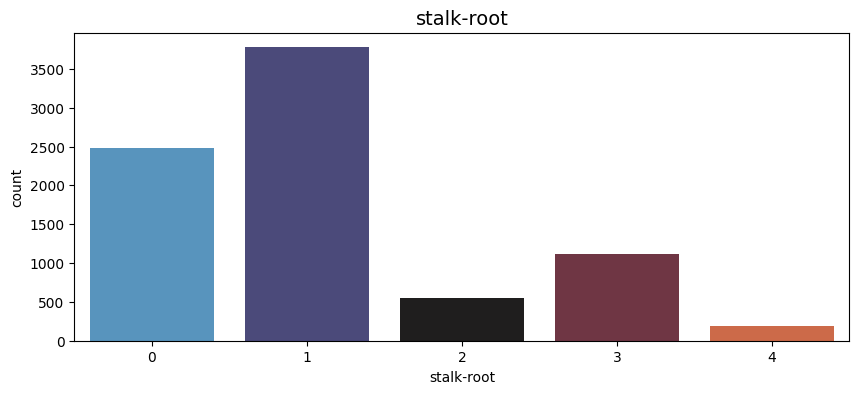

% of total:
1    46.48
0    30.53
3    13.79
2     6.84
4     2.36
Name: stalk-root, dtype: float64


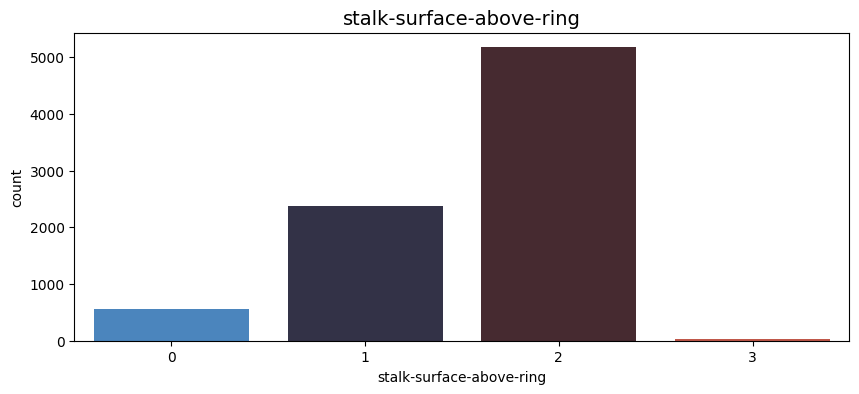

% of total:
2    63.71
1    29.20
0     6.79
3     0.30
Name: stalk-surface-above-ring, dtype: float64


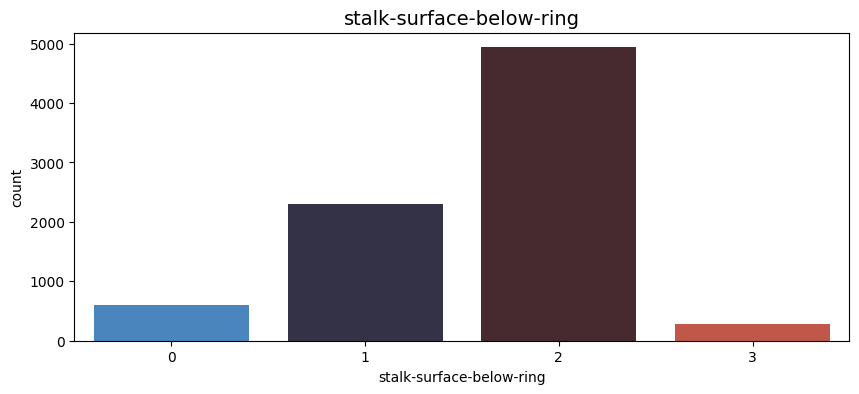

% of total:
2    60.76
1    28.36
0     7.39
3     3.50
Name: stalk-surface-below-ring, dtype: float64


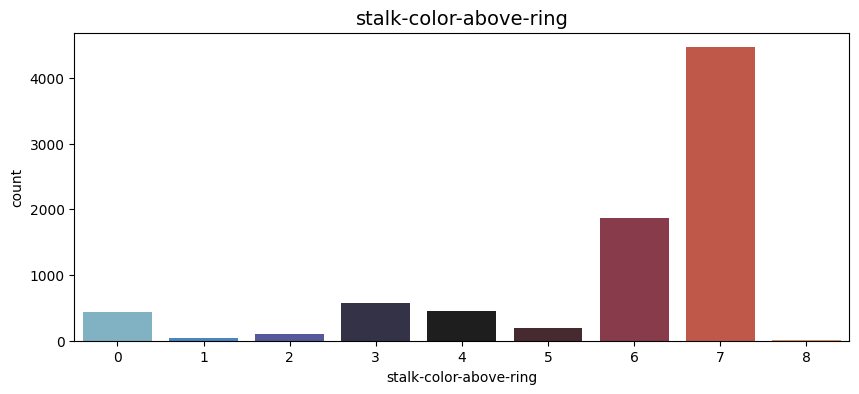

% of total:
7    54.95
6    23.04
3     7.09
4     5.51
0     5.32
5     2.36
2     1.18
1     0.44
8     0.10
Name: stalk-color-above-ring, dtype: float64


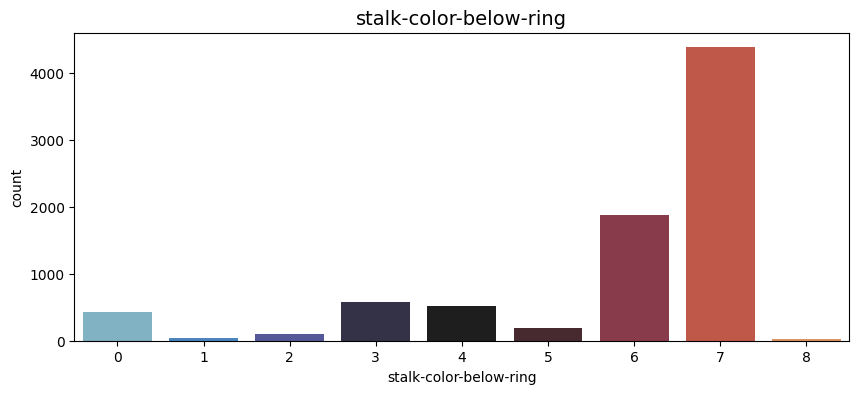

% of total:
7    53.96
6    23.04
3     7.09
4     6.30
0     5.32
5     2.36
2     1.18
1     0.44
8     0.30
Name: stalk-color-below-ring, dtype: float64


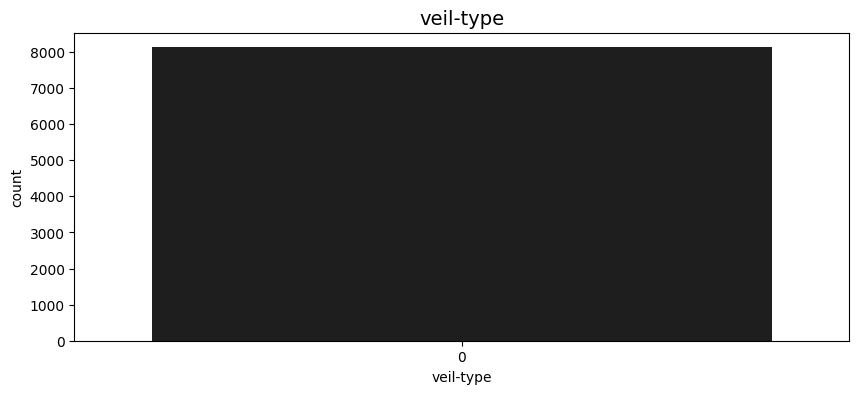

% of total:
0    100.0
Name: veil-type, dtype: float64


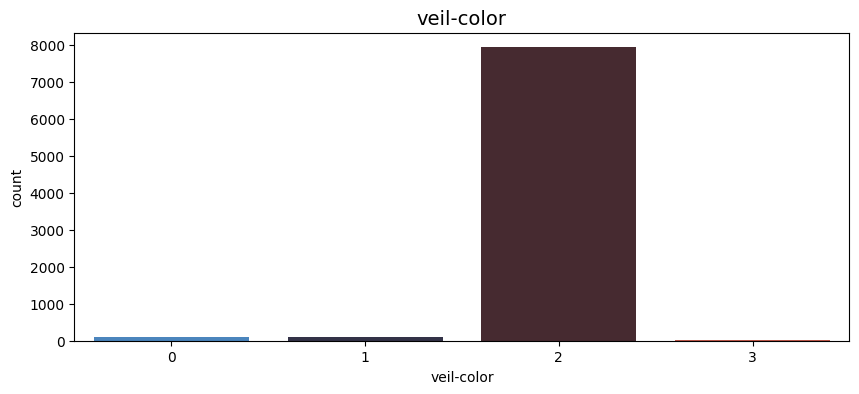

% of total:
2    97.54
0     1.18
1     1.18
3     0.10
Name: veil-color, dtype: float64


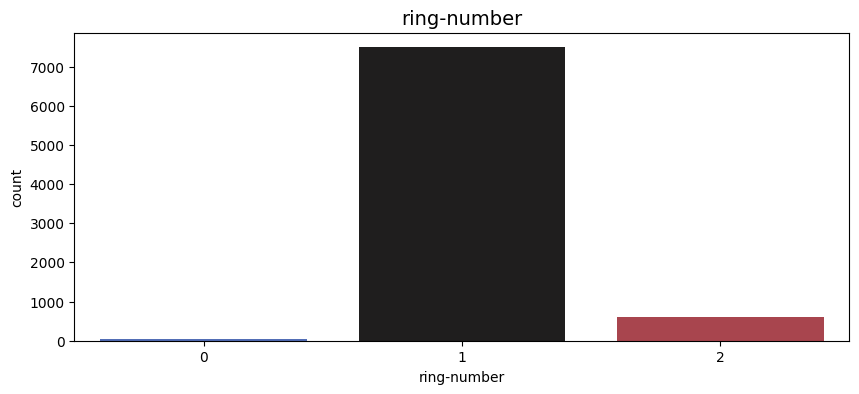

% of total:
1    92.17
2     7.39
0     0.44
Name: ring-number, dtype: float64


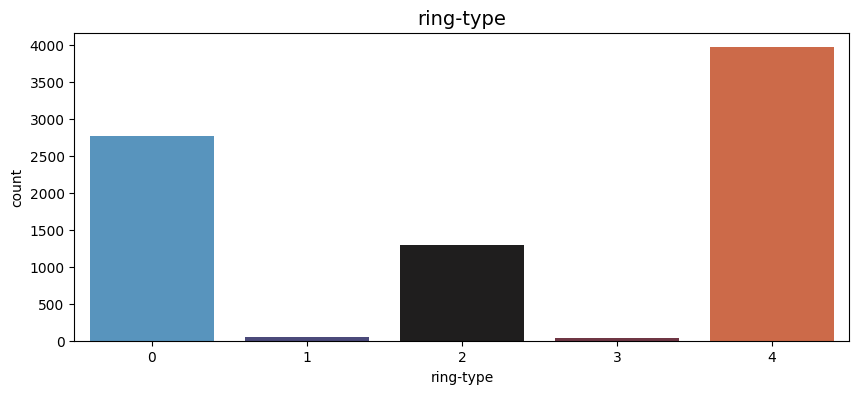

% of total:
4    48.84
0    34.17
2    15.95
1     0.59
3     0.44
Name: ring-type, dtype: float64


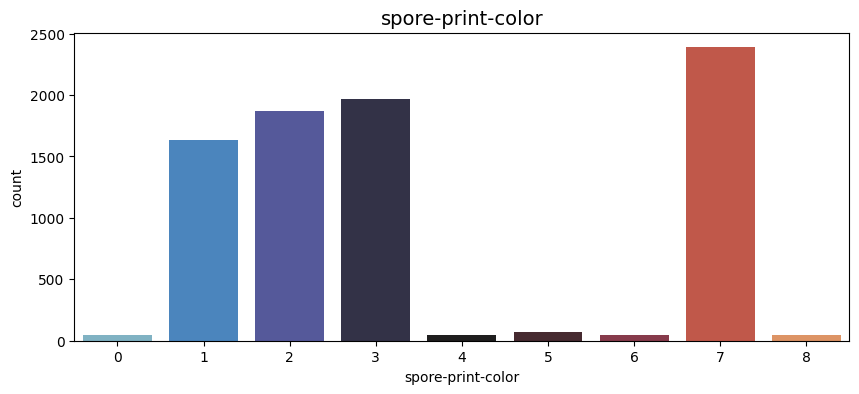

% of total:
7    29.39
3    24.22
2    23.04
1    20.09
5     0.89
6     0.59
4     0.59
8     0.59
0     0.59
Name: spore-print-color, dtype: float64


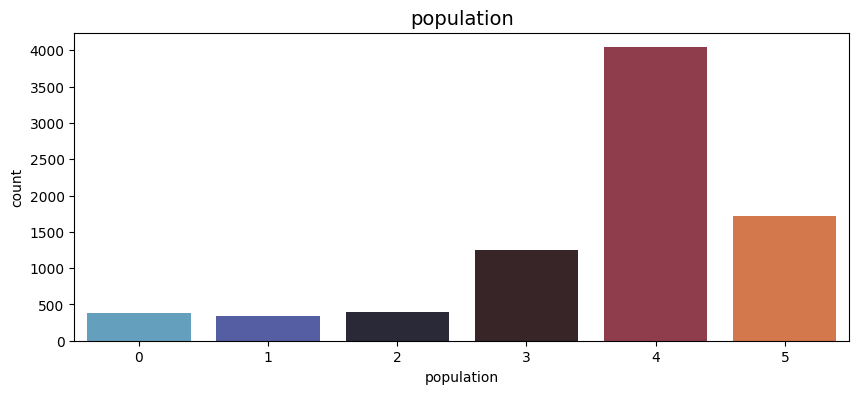

% of total:
4    49.73
5    21.07
3    15.36
2     4.92
0     4.73
1     4.19
Name: population, dtype: float64


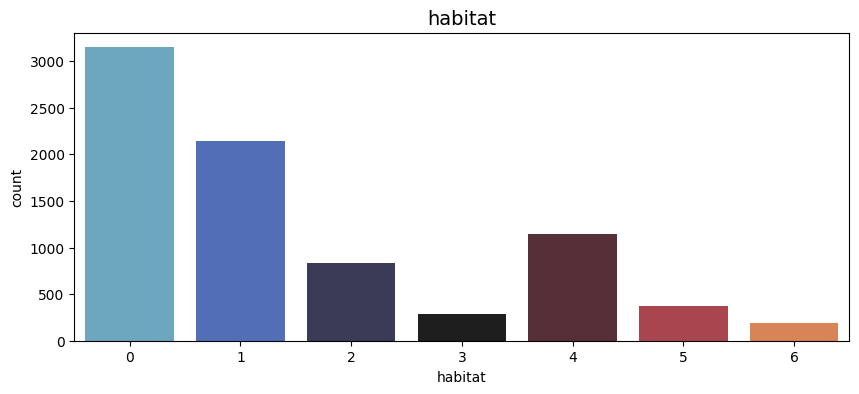

% of total:
0    38.75
1    26.44
4    14.08
2    10.24
5     4.53
3     3.59
6     2.36
Name: habitat, dtype: float64


In [18]:
# Univariate Analysis
#The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=data ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((data[col].value_counts()/data.shape[0]),4)*100)

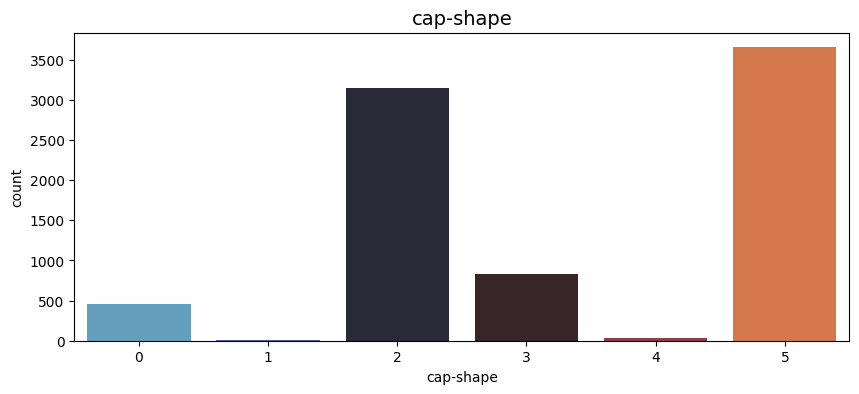

% of total:
5    45.00
2    38.80
3    10.19
0     5.56
4     0.39
1     0.05
Name: cap-shape, dtype: float64


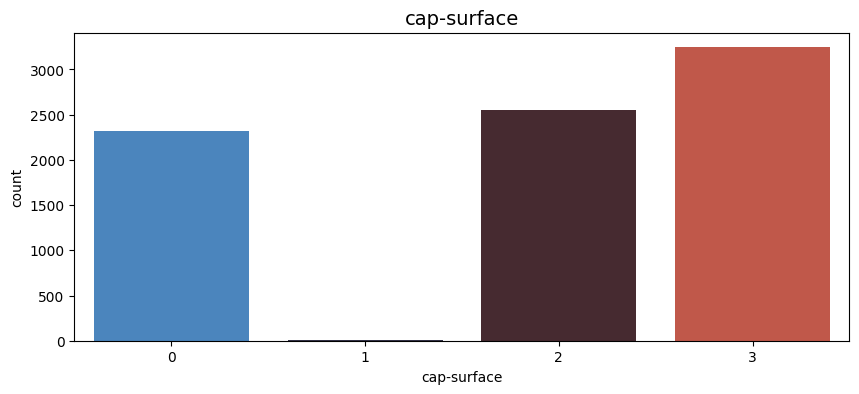

% of total:
3    39.93
2    31.46
0    28.56
1     0.05
Name: cap-surface, dtype: float64


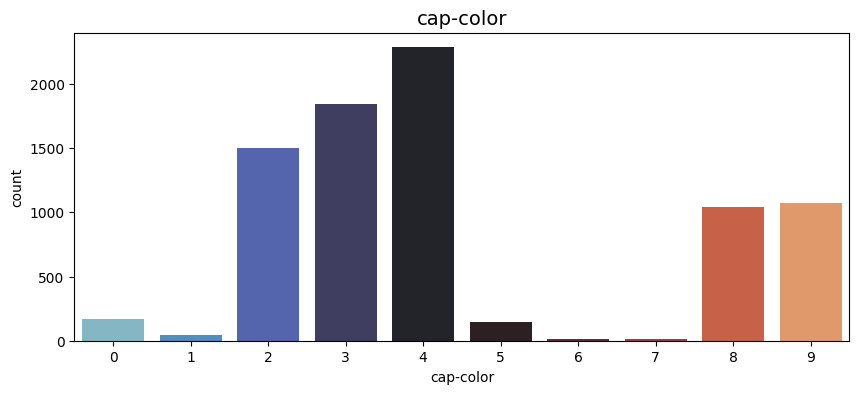

% of total:
4    28.11
3    22.65
2    18.46
9    13.20
8    12.80
0     2.07
5     1.77
1     0.54
7     0.20
6     0.20
Name: cap-color, dtype: float64


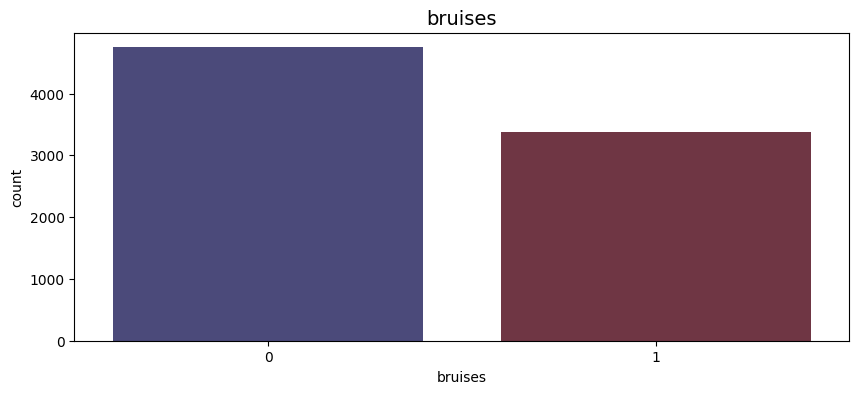

% of total:
0    58.44
1    41.56
Name: bruises, dtype: float64


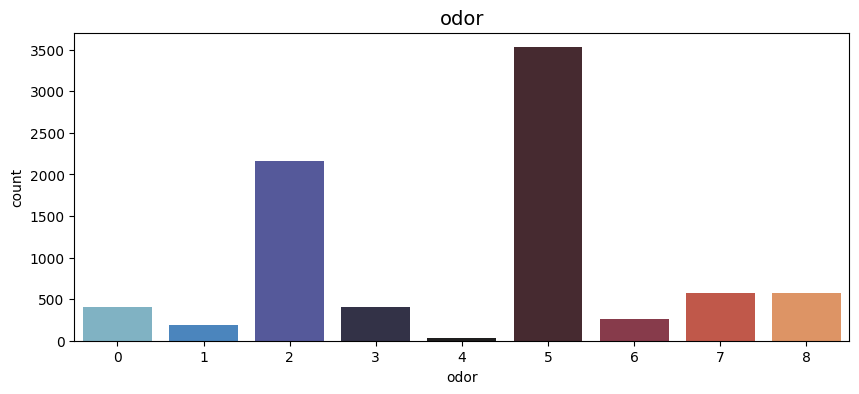

% of total:
5    43.43
2    26.59
8     7.09
7     7.09
0     4.92
3     4.92
6     3.15
1     2.36
4     0.44
Name: odor, dtype: float64


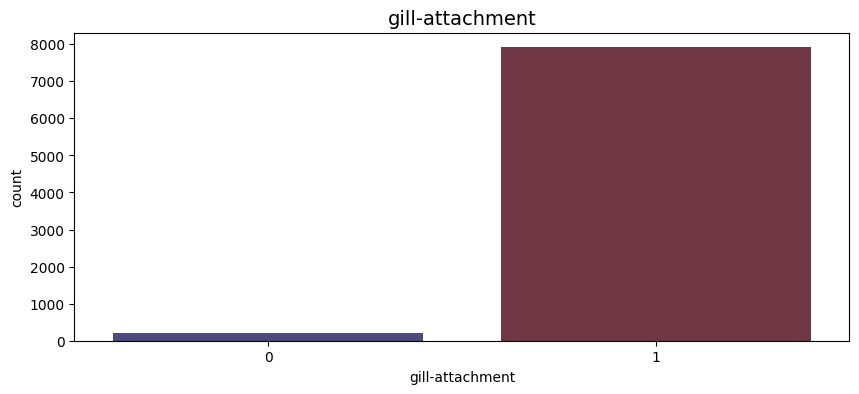

% of total:
1    97.42
0     2.58
Name: gill-attachment, dtype: float64


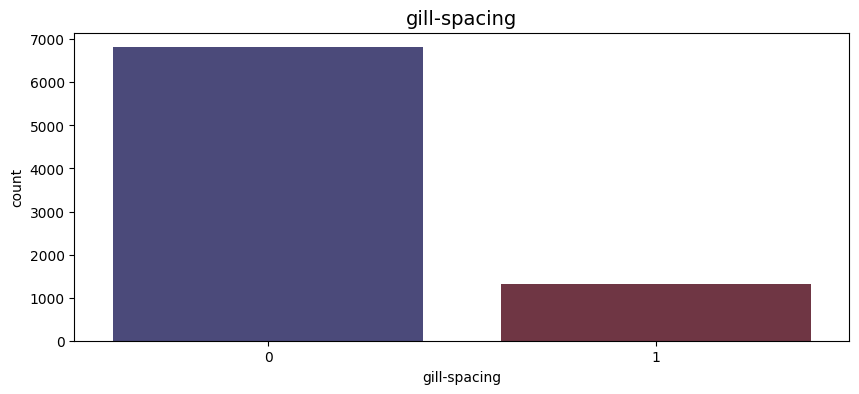

% of total:
0    83.85
1    16.15
Name: gill-spacing, dtype: float64


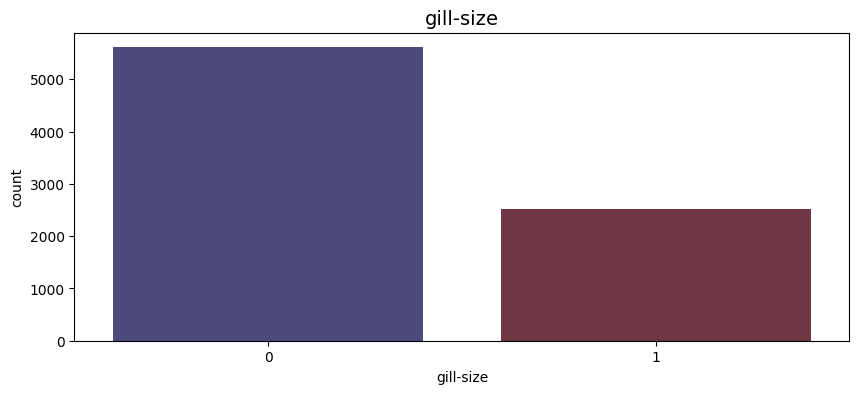

% of total:
0    69.08
1    30.92
Name: gill-size, dtype: float64


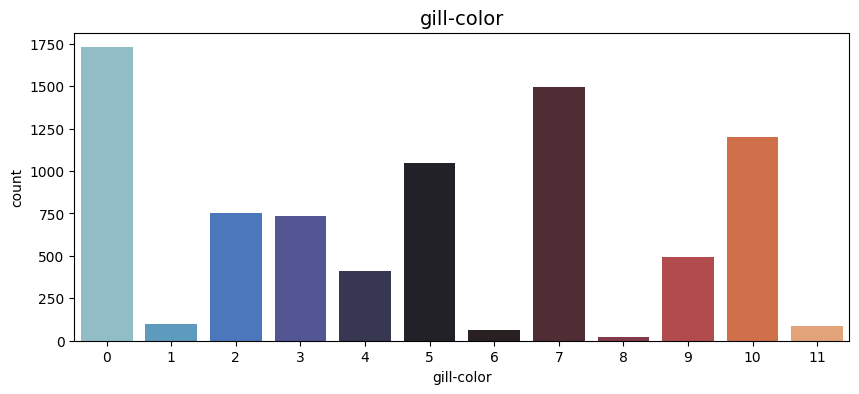

% of total:
0     21.27
7     18.37
10    14.80
5     12.90
2      9.26
3      9.01
9      6.06
4      5.02
1      1.18
11     1.06
6      0.79
8      0.30
Name: gill-color, dtype: float64


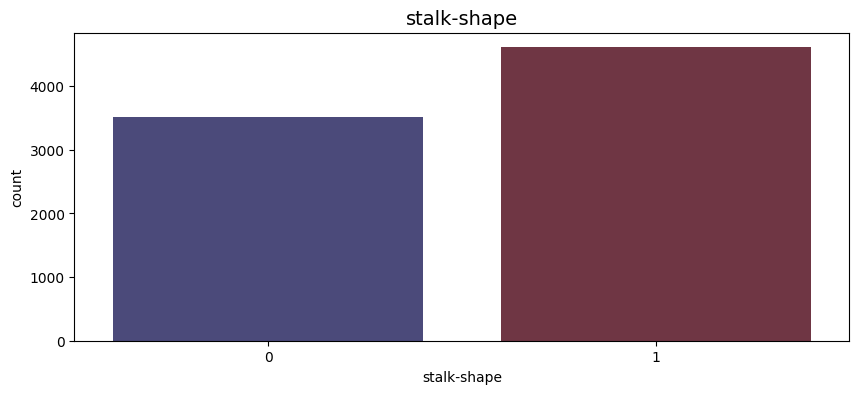

% of total:
1    56.72
0    43.28
Name: stalk-shape, dtype: float64


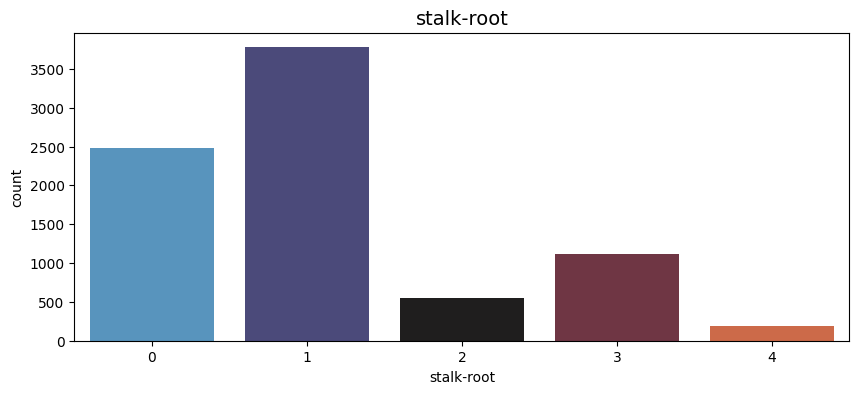

% of total:
1    46.48
0    30.53
3    13.79
2     6.84
4     2.36
Name: stalk-root, dtype: float64


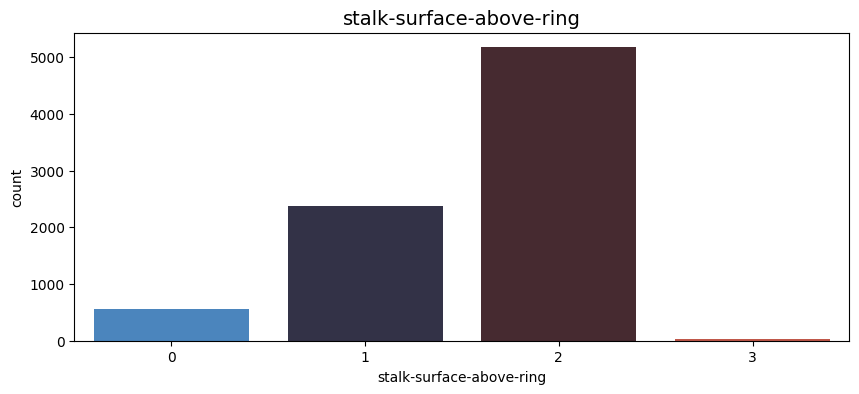

% of total:
2    63.71
1    29.20
0     6.79
3     0.30
Name: stalk-surface-above-ring, dtype: float64


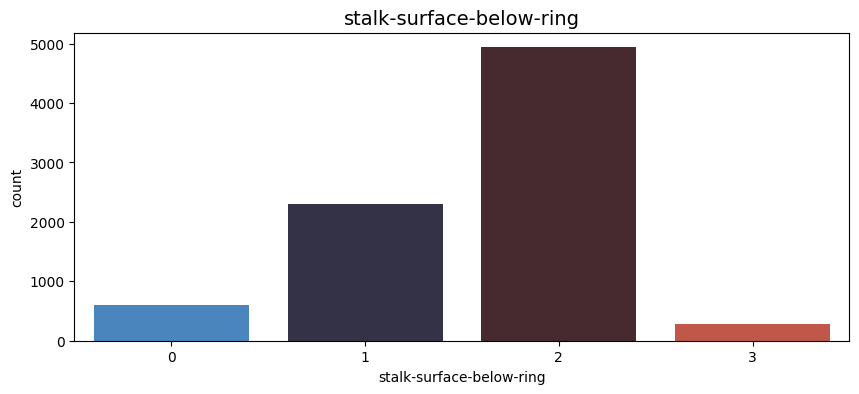

% of total:
2    60.76
1    28.36
0     7.39
3     3.50
Name: stalk-surface-below-ring, dtype: float64


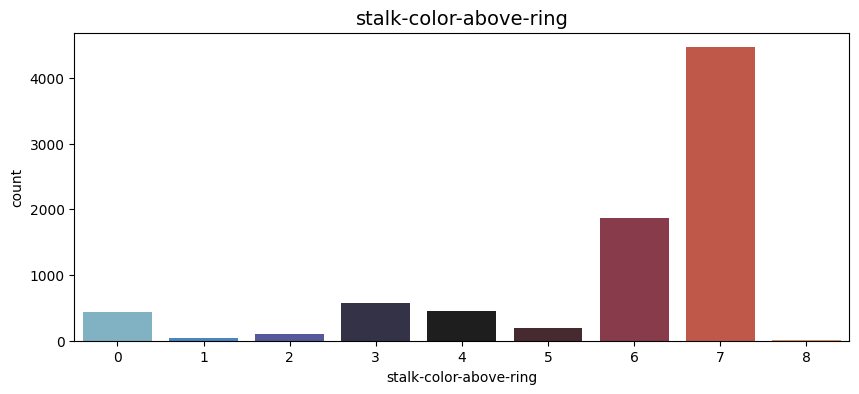

% of total:
7    54.95
6    23.04
3     7.09
4     5.51
0     5.32
5     2.36
2     1.18
1     0.44
8     0.10
Name: stalk-color-above-ring, dtype: float64


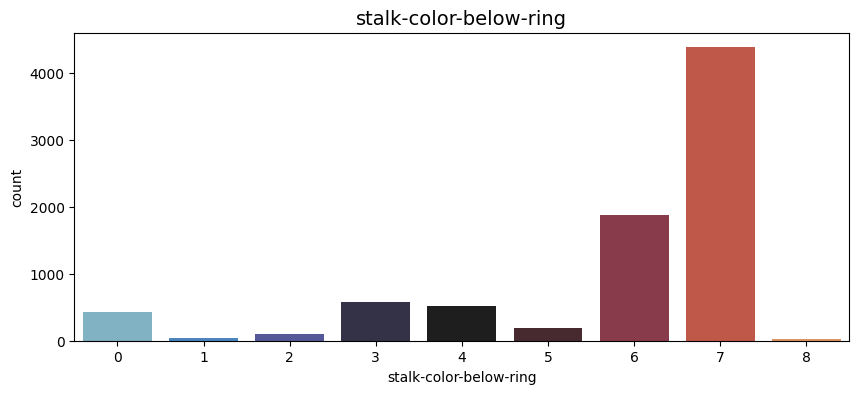

% of total:
7    53.96
6    23.04
3     7.09
4     6.30
0     5.32
5     2.36
2     1.18
1     0.44
8     0.30
Name: stalk-color-below-ring, dtype: float64


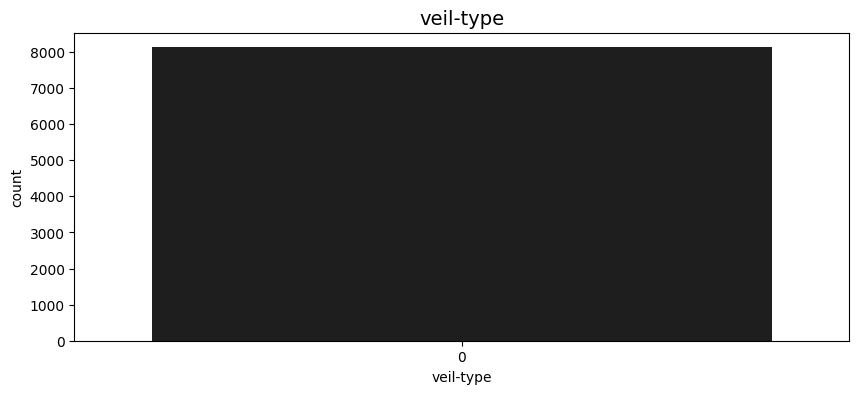

% of total:
0    100.0
Name: veil-type, dtype: float64


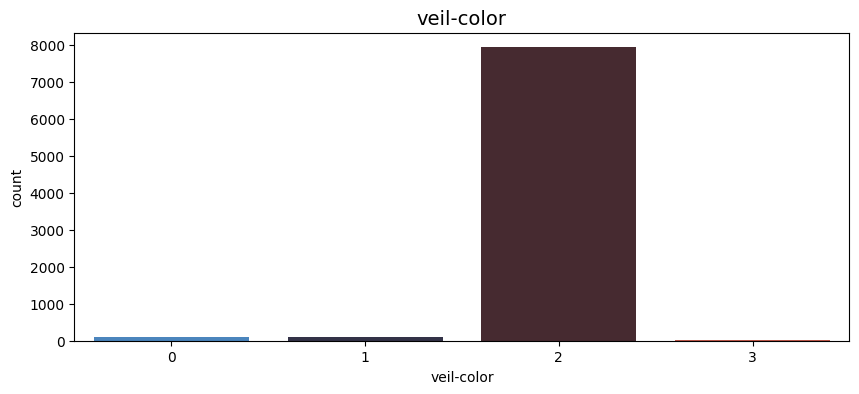

% of total:
2    97.54
0     1.18
1     1.18
3     0.10
Name: veil-color, dtype: float64


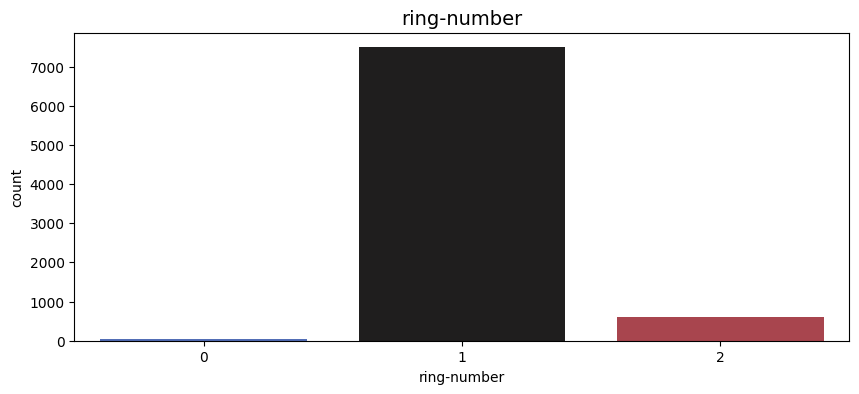

% of total:
1    92.17
2     7.39
0     0.44
Name: ring-number, dtype: float64


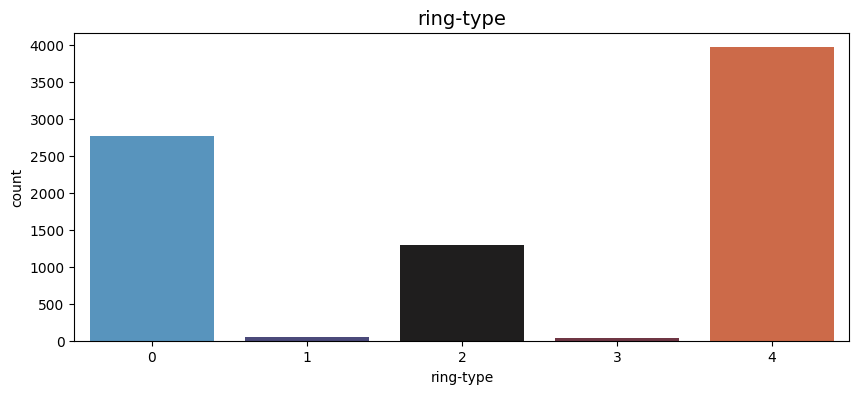

% of total:
4    48.84
0    34.17
2    15.95
1     0.59
3     0.44
Name: ring-type, dtype: float64


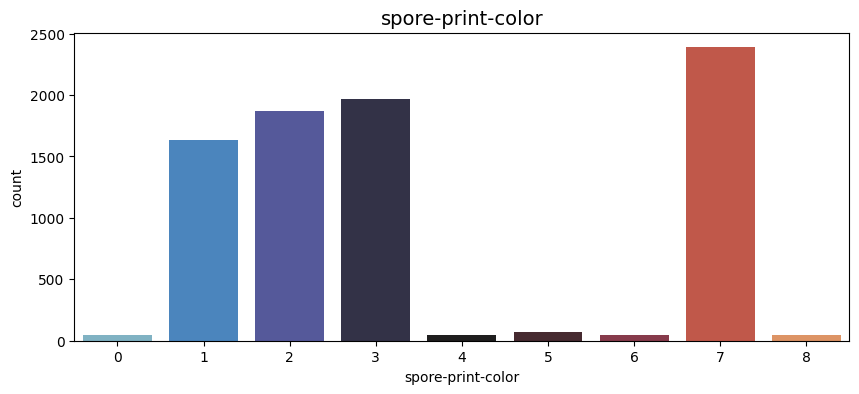

% of total:
7    29.39
3    24.22
2    23.04
1    20.09
5     0.89
6     0.59
4     0.59
8     0.59
0     0.59
Name: spore-print-color, dtype: float64


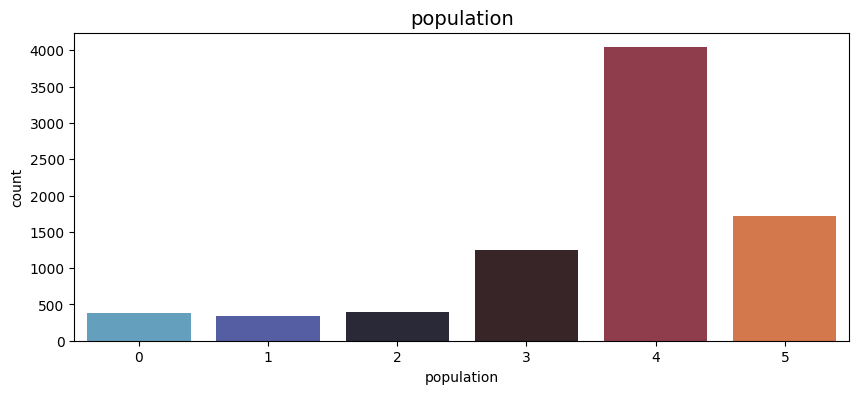

% of total:
4    49.73
5    21.07
3    15.36
2     4.92
0     4.73
1     4.19
Name: population, dtype: float64


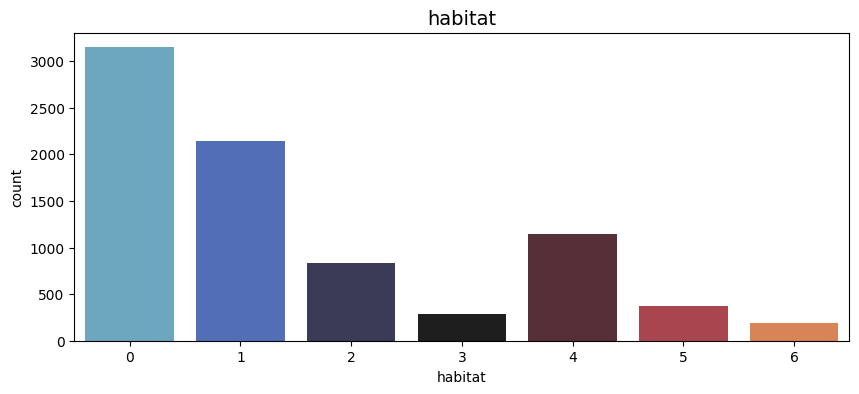

% of total:
0    38.75
1    26.44
4    14.08
2    10.24
5     4.53
3     3.59
6     2.36
Name: habitat, dtype: float64


In [19]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=data ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((data[col].value_counts()/data.shape[0]),4)*100)

# Unvariate Analisys:
 1. cap-shape - Most of the mushrooms in our dataset have a convex (45%) or a flat (38.8%) cap
 2. cap-surface - Most frequent cap surface is scaly (39.93%) we have next to non grooves (0.05%)
 3. cap-color - Over half of the mushrooms in our dataset have a brown (28.11%) or a gray (22.65%) cap color, we also                      have 8 other colors that appear less often.
 4. bruises - Most of the mushrooms in our dataset are not bruised (58.44%)
 5. odor - Most frequent scents (over 70%) are either no smell (43.43%) or a foul smell (26.59%).
 6. gill-attachment - Almost our entire data has free gill attachment (about 97.5%) so this column is pretty much usless                       in our analysis.
 7. gill-spacing - More than 85% of the mushrooms in our dataset have a close gill spacing so it has little to no impact                    in our analysis.
 8. gill-size - Most of the mushrooms in our dataset have a broad (69.08%) gil sizes others are narrow.
 9. gill-color - Over half of the mushrooms in our dataset have a buff (21.27%),pink (18.37%) or a white (22.65%) gill                    color, we also have 9 other colors that appear less often.
 10. stalk-shape - Most of the mushrooms in our dataset have a tapering (56.72%) others are enlarging.
 11. stalk-root - Most frequent stalk roots (over 75%) are either bulbous (46.48%) or silky (30.53%).
 12. stalk-surface-above-ring - Most frequent stalk surface above ring (over 90%) are either smooth (63.71%) or silky                                     (29.2%).
 13. stalk-surface-below-ring - Most frequent stalk surface below ring (almost 90%) are either smooth (60.76%) or silky                                   (28.36%) next to no difference from stalk-surface-above-ring.
 14. stalk-color-above-ring - Over half of the mushrooms in our dataset have a white (54.95%) stalk color, we also have 8                               other colors that appear less often.
 15. stalk-color-below-ring - Over half of the mushrooms in our dataset have a white (53.96%) stalk color, we also have 8 other colors that appear less often, next to no difference from stalk-color-above-ring.
 16. veil-type - All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.
 17. veil-color - Almost all of the mushroom's veil color are white (97.54%) so this column is pretty much usless in our analysis.
 18. ring-number - Almost all of the mushroom's ring number amount are one (92.17%) so this column is pretty much usless in our analysis.
 19. ring-type - Over 98% of the mushrooms in our dataset have a pendant (48.84%),evanescent (34.17%) or a large (15.95%) ring type.
 20. spore-print-color - most frequent colors are white (29.39%),brown (24.22%) ,black (23.04%) and chocolate (20.09%), the other colors are insignificant.
 21. population - Most frequent populations (over 70%) are either several (49.73%) or solitary (21.07%).
 22. habitat - Most frequent habitats (over 65%) are either woods (38.75%) or grasses (26.44%).

# Multivariate Analysis
  Multivariate analysis is the analysis of more than one variable.

In [20]:
# TO STORE FEATURE MATRIX IN x AND RESPONSE(TARGET) IN VECTOR y
x=data.drop('class',axis=1)
y=data['class']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-type'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

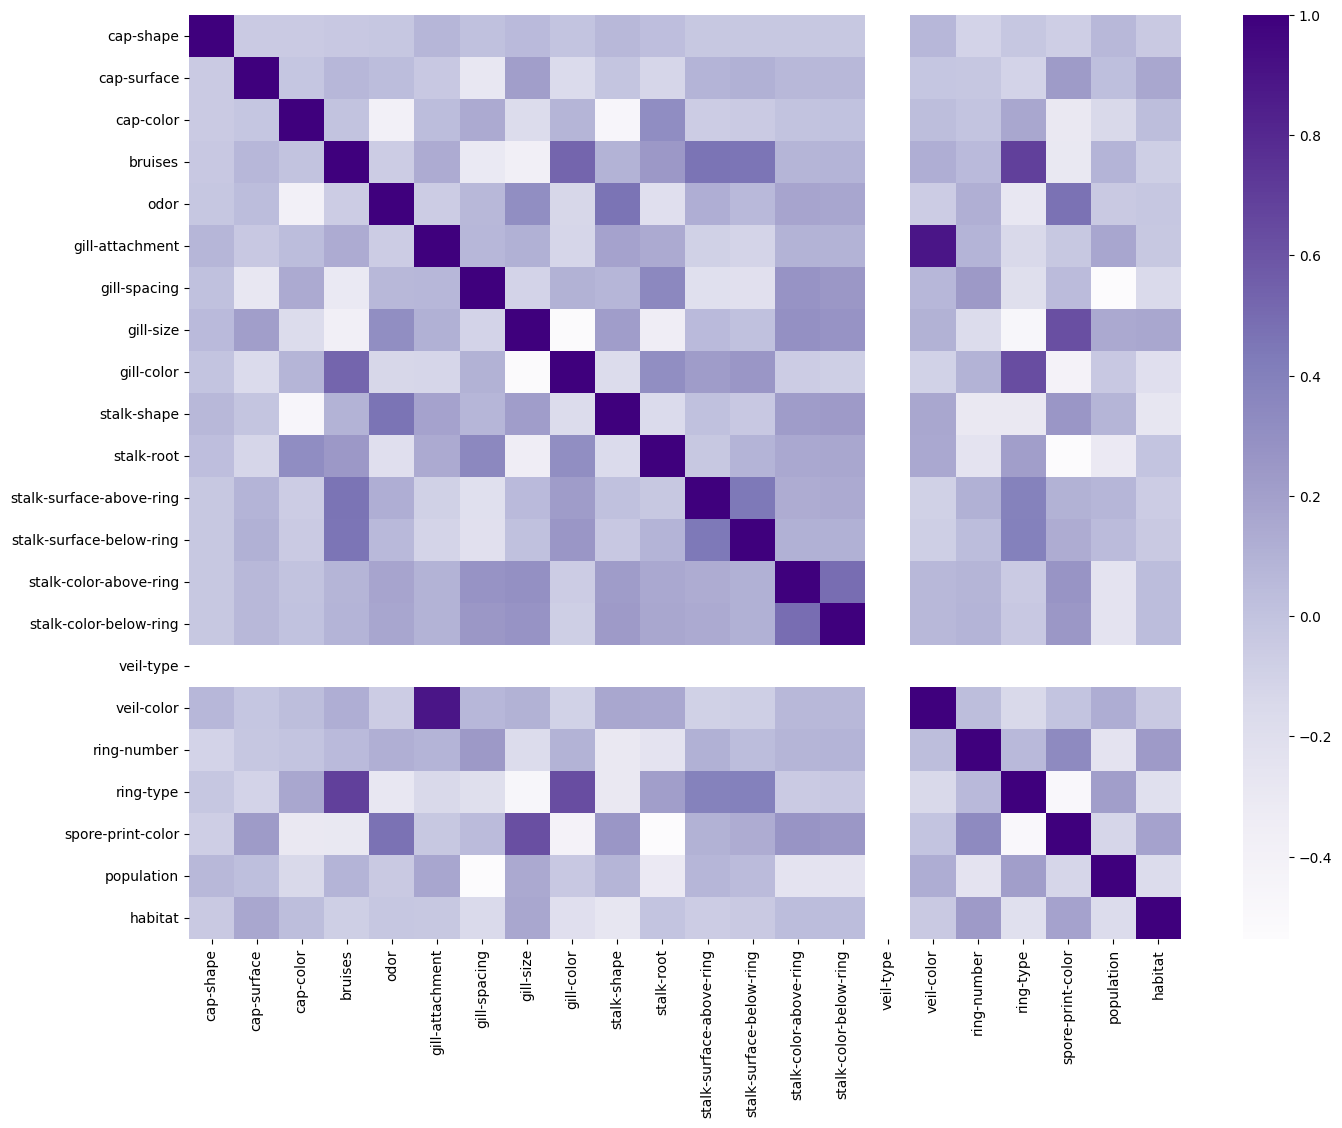

In [21]:
#Corelation
plt.figure(figsize=(16,12))
sns.heatmap(x.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'cap-shape'),
  Text(0, 1.5, 'cap-surface'),
  Text(0, 2.5, 'cap-color'),
  Text(0, 3.5, 'bruises'),
  Text(0, 4.5, 'odor'),
  Text(0, 5.5, 'gill-attachment'),
  Text(0, 6.5, 'gill-spacing'),
  Text(0, 7.5, 'gill-size'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stalk-shape'),
  Text(0, 10.5, 'stalk-root'),
  Text(0, 11.5, 'stalk-surface-above-ring'),
  Text(0, 12.5, 'stalk-surface-below-ring'),
  Text(0, 13.5, 'stalk-color-above-ring'),
  Text(0, 14.5, 'stalk-color-below-ring'),
  Text(0, 15.5, 'veil-type'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

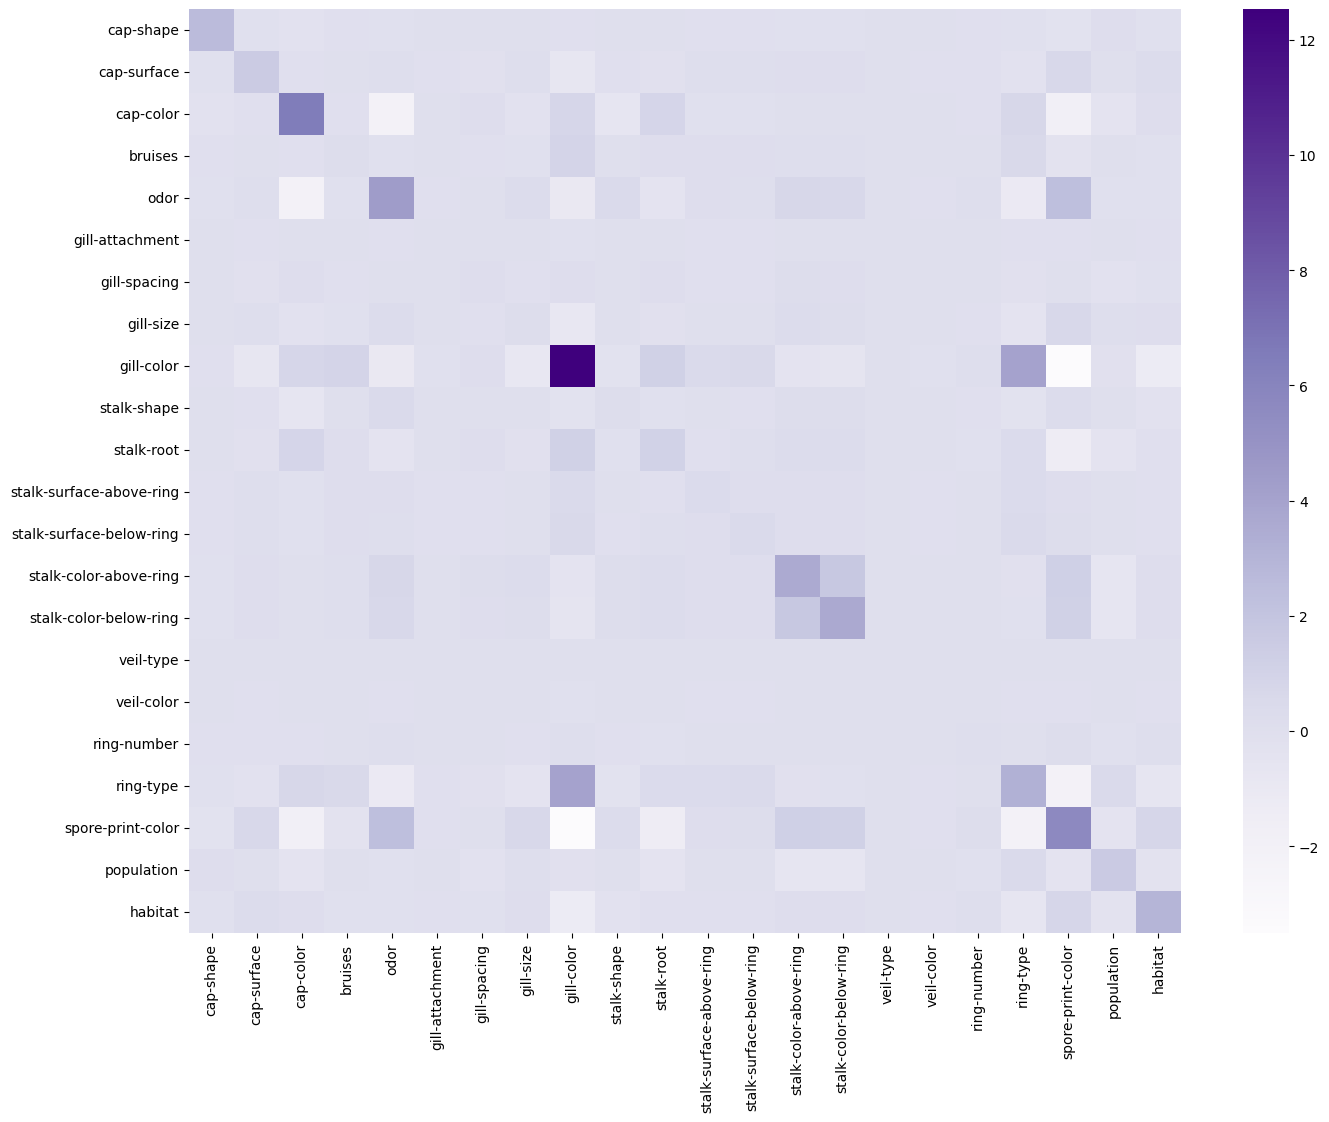

In [22]:
#Covariance
plt.figure(figsize=(16,12))
sns.heatmap(x.cov(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0)

In [23]:
# APPLYING PCA
pca1=PCA(n_components=0.90)
pca_fit=pca1.fit_transform(x)
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841, 0.03908416, 0.03577877])

In [24]:
sum(pca1.explained_variance_ratio_)

0.925031088301385

In [25]:
# TO SPLIT THE DATASET INTO THE TRAINING SET AND TEST SET
x_train,x_test,y_train,y_test=train_test_split(pca_fit,y,test_size=0.20,random_state=42)

In [26]:
# MODEL TRAINING
lr=LogisticRegression()
lr.fit(x_train,y_train)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

svc=SVC()
svc.fit(x_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

rm=RandomForestClassifier()
rm.fit(x_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [27]:
# PREDICTION ON TEST DATA
y_pred1=lr.predict(x_test)
y_pred2=knn.predict(x_test)
y_pred3=svc.predict(x_test)
y_pred4=dt.predict(x_test)
y_pred5=rm.predict(x_test)
y_pred6=gb.predict(x_test)

In [28]:
# EVALUATING THE ALGORITHM
print("Accuracy Of LR", accuracy_score(y_test,y_pred1))
print("Accuracy Of KNN", accuracy_score(y_test,y_pred2))
print("Accuracy Of SVC", accuracy_score(y_test,y_pred3))
print("Accuracy Of DT", accuracy_score(y_test,y_pred4))
print("Accuracy Of RM", accuracy_score(y_test,y_pred5))
print("Accuracy Of GBC", accuracy_score(y_test,y_pred6))

Accuracy Of LR 0.832
Accuracy Of KNN 0.9944615384615385
Accuracy Of SVC 0.9778461538461538
Accuracy Of DT 0.984
Accuracy Of RM 0.9981538461538462
Accuracy Of GBC 0.9507692307692308


In [29]:
final_data=pd.DataFrame({'Models':['LR','KNN','SVC','DT','RM','GBC'],
              'ACCURACY':[accuracy_score(y_test,y_pred1)*100,
                          accuracy_score(y_test,y_pred2)*100,
                          accuracy_score(y_test,y_pred3)*100,
                          accuracy_score(y_test,y_pred4)*100,
                          accuracy_score(y_test,y_pred5)*100,
                          accuracy_score(y_test,y_pred6)*100]})
final_data

,Models,ACCURACY
0,LR,83.200000
1,KNN,99.446154
2,SVC,97.784615
3,DT,98.400000
4,RM,99.815385
5,GBC,95.076923


In [30]:
# SAVE THE MODEL
rf_model=RandomForestClassifier()
rf_model.fit(pca_fit,y)

RandomForestClassifier()